<a href="https://colab.research.google.com/github/AguaClara/CEE4520/blob/master/Unit_Process_Designs/Coagulant_Dose_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coagulant Dose Estimator

The goal is to estimate a reasonable coagulant dose given the raw water turbidity and apparent color. 

Apparent color is corrected for false color caused by turbidity using a relationship that was obtained from analysis in the Gracias water treatment plant laboratory. Raw water turbidity multiplied by 7.5 yields the false color.

True color is then converted to Total Organic Carbon using the table below from:

[Natural Organic Matter in Drinking Water: Recommendations to Water Utilities
By Billy H. Kornegay, Keith J. Kornegay, Evelyn Torres, AWWA Research Foundation](https://books.google.com/books?id=rVb-EL1OBToC&pg=PA75&lpg=PA75&dq=correlation+between+color+and+TOC&source=bl&ots=uxnFvEMRdZ&sig=ACfU3U08cWlzkKiRQvgEy5dk15IQv12TEA&hl=en&sa=X&ved=2ahUKEwjappGSsZjqAhXCSt8KHciyBukQ6AEwA3oECAgQAQ#v=onepage&q&f=false)

![alt text](https://github.com/AguaClara/CEE4520/raw/master/Unit_Process_Designs/images/Color-TOC-alum_table.PNG)

Color is converted to TOC using a factor of 7.73. The only Natural Organic Matter that we have characterized for coagulant demand is humic acid. We quantified the humic acid based on total dry mass. Organic matter is about 50 % carbon and thus to get the total dry mass we multiply the TOC by 2.

In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 3.5MB/s 
     |████████████████████████████████| 204kB 12.6MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.3-cp36-none-any.whl size=99459 sha256=f99f4f8c56bb08c4b8de108f132ea3ba1d6b9d55e148c9e391e74ed9826d9dd4
  Stored in directory: /root/.cache/pip/wheels/da/f3/b6/a4648b3b3bc239e7953e74a2dee9f21c07d1b1e1f65cb86311
Successfully built aguaclara


In [46]:
##import
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 

## constants & variables
DiamTube = 4 * u.inch
Temp = 10 * u.degC
Time = 4 * u.min
EnergyDis = 40 * u.cm * u.gravity / Time
NatOrgMat = ac.HumicAcid
material = ac.Clay
coag = ac.PACl
FittingParam = 0.13
RatioHeightDiameter = 0.2

The concentration of organic matter is estimated to be 19.23 milligram / liter
The coagulant dose as aluminum is 7.195 milligram / liter or approximately 21.58 milligram / liter as PACl.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

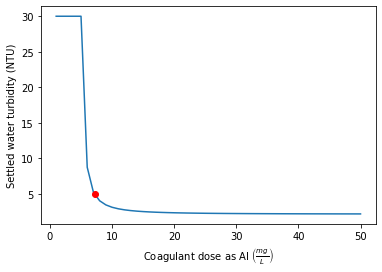

In [63]:
Raw_Turbidity = 30 * u.NTU
Color = 300
Target_Turbidity = 5 * u.NTU


True_Color = Color - ConcClay*7.5/(u.NTU)
TOC = True_Color / 7.8 * u.mg/u.L
ConcNatOrgMat = TOC*2
print('The concentration of organic matter is estimated to be', ConcNatOrgMat)
ConcAl = np.linspace(1,50) * u.mg/u.L
#define a possible organic molecule that makes the water yellow. The molecular weight is bogus and isn't used.
Gracias_yellow = ac.Material('Gracias_yellow',36*u.nm,900 * u.kg/u.m**3,900 * u.g/u.mol)


Eff_Turbidity = (ac.invp(ac.pc_viscous(EnergyDis, Temp, Time, DiamTube, Raw_Turbidity, ConcAl, ConcNatOrgMat, Gracias_yellow, coag, material, FittingParam, RatioHeightDiameter)) * ConcClay)

#reverse the arrays so that the interp function will work
reversed_Eff_Turbidity = Eff_Turbidity[::-1]
reversed_ConcAl = ConcAl[::-1]


Al_Dose = np.interp(Target_Turbidity, reversed_Eff_Turbidity, reversed_ConcAl)
print('The coagulant dose as aluminum is',Al_Dose,'or approximately',3*Al_Dose,'as PACl.')

plt.plot(ConcAl,Eff_Turbidity);
plt.xlabel(r'Coagulant dose as Al $\left(\frac{mg}{L}\right)$');
plt.ylabel('Settled water turbidity (NTU)');
plt.plot(Al_Dose,Target_Turbidity,'ro');
plt.show